# Klasifikasi Gambar

# Kelompok 2


*   Repan Dhia Nararya (2202331)
*   Naufal Nabil Anugrah (2201090)
*   Muhamad Tio Ariyanto (2201718)
*   Jasmine Noor Fawzia (2200598)

# Studi Case : Mengklasifikasikan Jenis Bangunan

# Daftar Isi

1. Daftar Isi
2. Problem Statement
3. Foto Yang Digunakan
4. Import Library
5. Memasukkan directory dari dataset fotonya
6. Cek Jumlah Instance
7. Cek Jumlah Instance per Class
8. Memuat dataset train dan test
9. Cek nama class
10. Preview dataset train
11. Cek Dimensi Data Train
12. Set Cache Buffer untuk meningkatkan efisiensi training
13. Normalisasi nilai RGB
14. Membuat arsitektur Deep Learning (1)
    - Compile Model
    - Ringkasan Arsitektur
    - Training data
    - Plot Hasil Training
15. Membuat arsitektur Deep Learning (2)
    - Compile Model
    - Ringkasan Arsitektur
    - Training data
    - Plot Hasil Training
16. Penanganan Overfitting
    - Augmentasi
    - Test hasil augmentasi secara visual
17. Membuat arsitektur Deep Learning (3)
    - Compile Model
    - Ringkasan Arsitektur
    - Training data
    - Plot Hasil Training
18. Membuat arsitektur Deep Learning (4)
    - Compile Model
    - Training data
    - Plot Hasil Training
19. Memprediksi jenis bangunan yang belum dilihat


# Problem Statement

Klasifikasi untuk membedakan jenis bangunan.

# Foto Yang Digunakan



1.   Apartemen = Bangunan tempat tinggal yang terdiri dari beberapa unit hunian dalam satu gedung atau kompleks.
2.   Restoran = Bangunan yang menyediakan makanan dan minuman kepada pelanggan, baik untuk makan di tempat atau layanan pengantaran.
3.   Retail = Bangunan yang digunakan untuk berbagai kegiatan perdagangan, seperti toko, supermarket, pusat perbelanjaan, atau toko eceran.
4.   Rumah = Bangunan tempat tinggal individu atau keluarga, yang terdiri dari satu unit hunian.
5.   Sekolah = Bangunan tempat pendidikan dan pembelajaran, seperti sekolah dasar, sekolah menengah, atau perguruan tinggi.
8.   Tempat Ibadah = Bangunan yang digunakan untuk kegiatan keagamaan, seperti gereja, masjid, kuil, atau vihara.


# Import Library

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
import pathlib
from google.colab import drive

# Memasukkan directory dari dataset fotonya

In [ ]:

drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/Kuliah/Datmin/DatminCrop'
data_dir = pathlib.Path(data_dir)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Cek Jumlah Instance

In [ ]:
# jumlah instance dataset
image_count_jpg = len(list(data_dir.glob('*/*.jpg')))
image_count_png = len(list(data_dir.glob('*/*.png')))
image_count_jpeg = len(list(data_dir.glob('*/*.jpeg')))
image_count = image_count_jpg + image_count_png + image_count_jpeg
print(image_count)

750


# Cek Jumlah Instance per Class

In [ ]:
import os
list_dir = [os.path.basename(x) for x in data_dir.iterdir() if x.is_dir()]
print("Jumlah class: {} ".format(len(list_dir)))
print("Jumlah instance per class")

for x in list_dir:
    jpg_count = len(list(data_dir.glob('{}/*.jpg'.format(x))))
    png_count = len(list(data_dir.glob('{}/*.png'.format(x))))
    jpeg_count = len(list(data_dir.glob('{}/*.jpeg'.format(x))))
    total_count = jpg_count + png_count + jpeg_count
    print("{} = {}".format(x, total_count))

Jumlah class: 6 
Jumlah instance per class
Tempat_Ibadah = 125
Sekolah = 125
Apartemen = 125
Restoran = 125
Rumah = 125
Retail = 125


# Memuat dataset train dan test

In [ ]:
# Muat dataset train
training_images = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(128, 128),
    batch_size=32,
)

# Muat dataset test
test_images = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(128, 128),
    batch_size=32,
)

Found 750 files belonging to 6 classes.
Using 600 files for training.
Found 750 files belonging to 6 classes.
Using 150 files for validation.


# Cek nama class

In [ ]:
class_names = training_images.class_names
print(class_names)

['Apartemen', 'Restoran', 'Retail', 'Rumah', 'Sekolah', 'Tempat_Ibadah']


# Preview dataset train

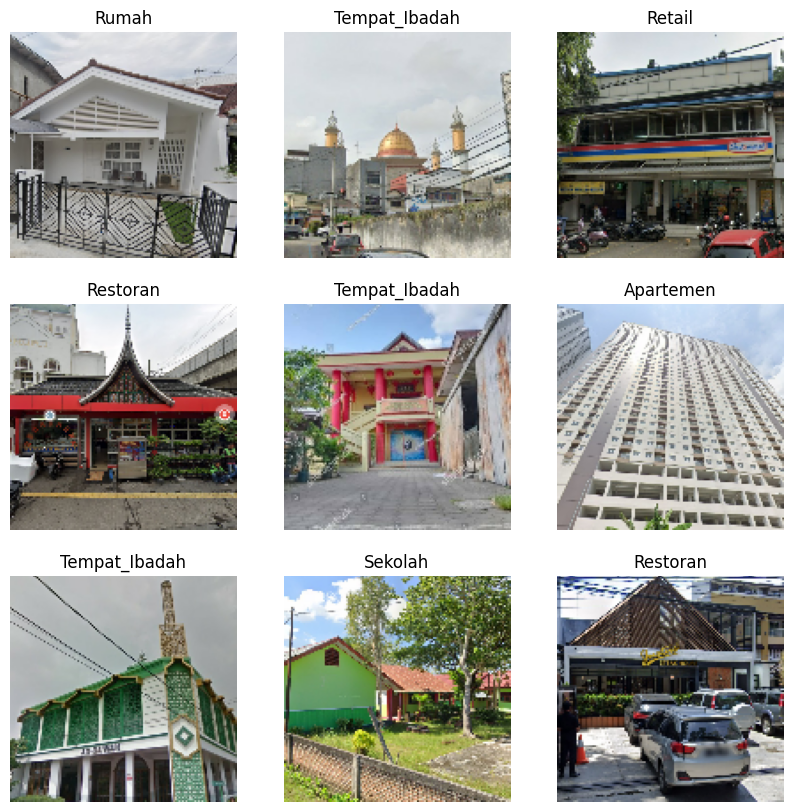

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in training_images.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1) # 3 baris, 3 kolom
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Cek Dimensi Data Train

In [ ]:
for image_batch, labels_batch in training_images:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


memperlihatkan batch, image height, image width, dan depth

# Set Cache Buffer untuk meningkatkan efisiensi training
Dengan cache di memory,
dataset dan model dapat disimpan di memory (bukan hard disk), sehingga akses untuk training
akan lebih cepat

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
training_images = training_images.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_images = test_images.cache().prefetch(buffer_size=AUTOTUNE)

# Normalisasi nilai RGB


In [ ]:
# normalisasi nilai RGB
normalization_layer = layers.Rescaling(1./255)
normalized_ds = training_images.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# nilai dari [0 sd 255] menjadi [0 sd 1]
print(np.min(first_image), np.max(first_image))

0.0 1.0


# Membuat arsitektur Deep Learning (1)
Jika menggunakan 3 layer

In [ ]:
num_classes = len(class_names)
model = Sequential([
layers.Rescaling(1./255, input_shape=(128, 128, 3)),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(num_classes)
])


### Compile Model

In [ ]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])


### Ringkasan Arsitektur

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 64, 64, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 64)       

## Training data

In [ ]:
epochs=10
history = model.fit(
training_images,
validation_data=test_images,
epochs=epochs
)


Epoch 1/10
19/19 [==============================] - 8s 312ms/step - loss: 1.9330 - accuracy: 0.2200 - val_loss: 1.7655 - val_accuracy: 0.3000
Epoch 2/10
19/19 [==============================] - 0s 16ms/step - loss: 1.7025 - accuracy: 0.3517 - val_loss: 1.6658 - val_accuracy: 0.2667
Epoch 3/10
19/19 [==============================] - 0s 12ms/step - loss: 1.5319 - accuracy: 0.3583 - val_loss: 1.6064 - val_accuracy: 0.3467
Epoch 4/10
19/19 [==============================] - 0s 13ms/step - loss: 1.3615 - accuracy: 0.4617 - val_loss: 1.4068 - val_accuracy: 0.4267
Epoch 5/10
19/19 [==============================] - 0s 12ms/step - loss: 1.1661 - accuracy: 0.5683 - val_loss: 1.3047 - val_accuracy: 0.5000
Epoch 6/10
19/19 [==============================] - 0s 12ms/step - loss: 0.9870 - accuracy: 0.6283 - val_loss: 1.3970 - val_accuracy: 0.4400
Epoch 7/10
19/19 [==============================] - 0s 12ms/step - loss: 0.9073 - accuracy: 0.6667 - val_loss: 1.2270 - val_accuracy: 0.5133
Epoch 8/10
1

## Plot Hasil Training

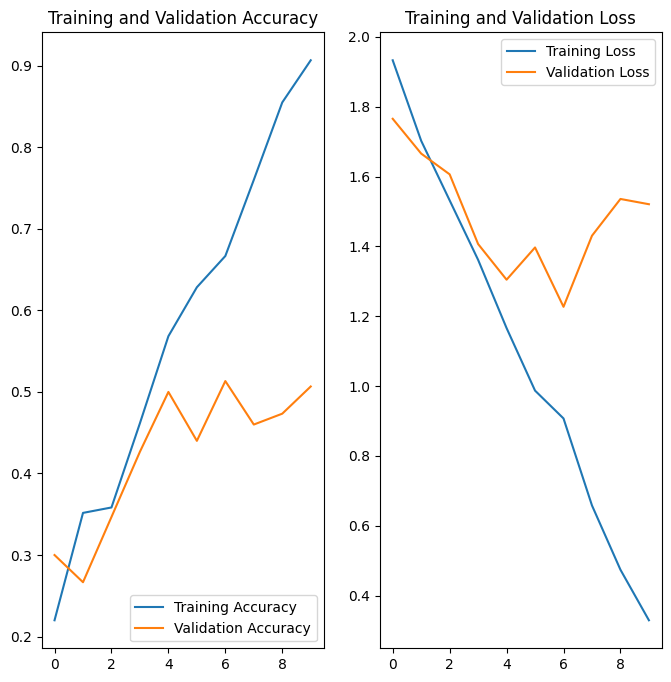

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Membuat arsitektur Deep Learning (2)
Jika menggunakan 4 layer

In [ ]:
num_classes = len(class_names)
model = Sequential([
layers.Rescaling(1./255, input_shape=(128, 128, 3)),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(128, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(num_classes)
])


### Compile Model

In [ ]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])


### Ringkasan Arsitektur

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 64, 64, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 64)       

## Training data

In [ ]:
epochs=10
history = model.fit(
training_images,
validation_data=test_images,
epochs=epochs
)


Epoch 1/10
19/19 [==============================] - 3s 32ms/step - loss: 1.7802 - accuracy: 0.2200 - val_loss: 1.7021 - val_accuracy: 0.2800
Epoch 2/10
19/19 [==============================] - 0s 16ms/step - loss: 1.6208 - accuracy: 0.3183 - val_loss: 1.5128 - val_accuracy: 0.3667
Epoch 3/10
19/19 [==============================] - 0s 15ms/step - loss: 1.4276 - accuracy: 0.3800 - val_loss: 1.4238 - val_accuracy: 0.4067
Epoch 4/10
19/19 [==============================] - 0s 16ms/step - loss: 1.2968 - accuracy: 0.4817 - val_loss: 1.3694 - val_accuracy: 0.4333
Epoch 5/10
19/19 [==============================] - 0s 16ms/step - loss: 1.1708 - accuracy: 0.5367 - val_loss: 1.3623 - val_accuracy: 0.4733
Epoch 6/10
19/19 [==============================] - 0s 14ms/step - loss: 1.0665 - accuracy: 0.6083 - val_loss: 1.2953 - val_accuracy: 0.5333
Epoch 7/10
19/19 [==============================] - 0s 15ms/step - loss: 0.9589 - accuracy: 0.6300 - val_loss: 1.2824 - val_accuracy: 0.4667
Epoch 8/10
19

## Plot Hasil Training

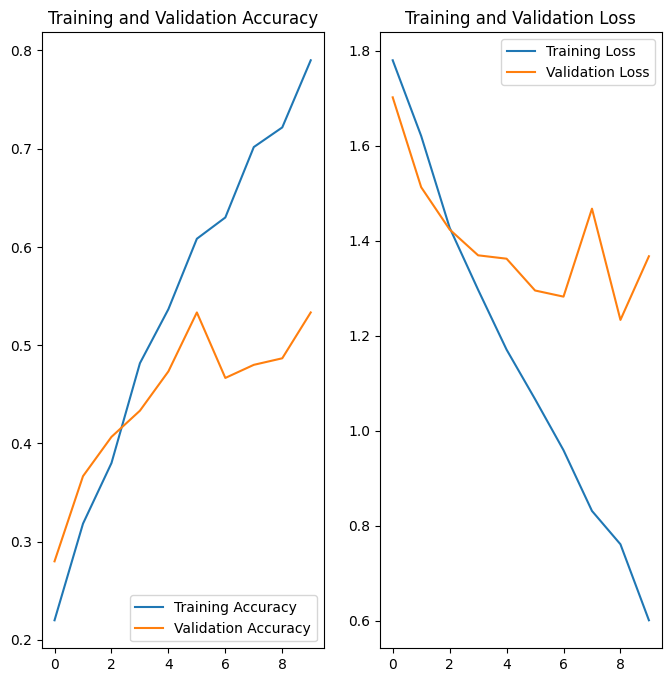

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Penanganan Overfitting
Lakukan penanganan overfitting jika data ada yang overfitting

## Augmentasi

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(128, 128, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

### Test hasil augmentasi secara visual

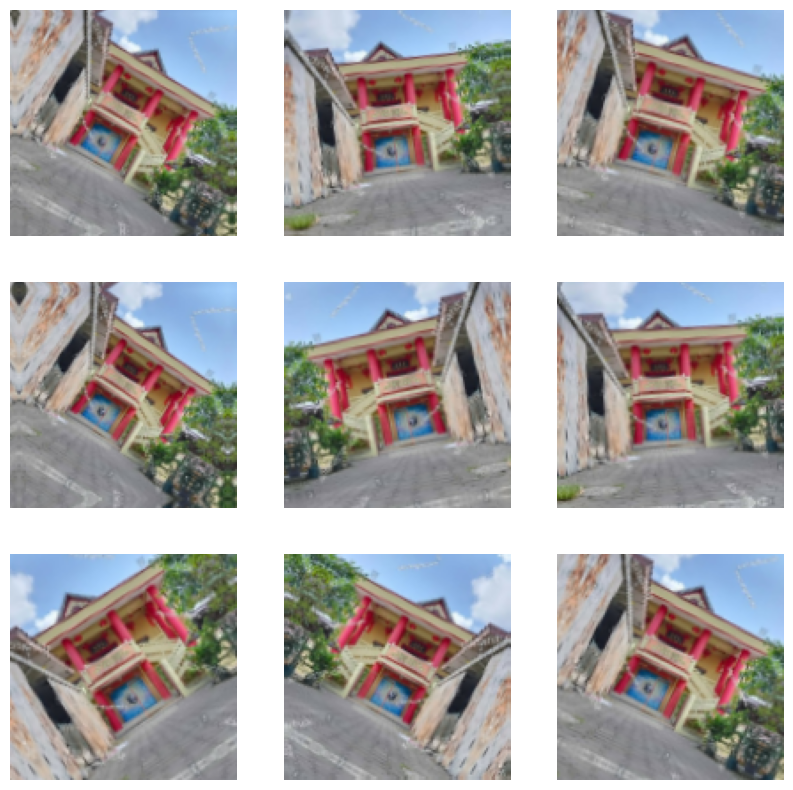

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in training_images.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


# Membuat arsitektur Deep Learning (3)
Jika menggunakan 3 layer setelah augmentasi

In [ ]:
num_classes = len(class_names)
model = Sequential([
layers.Rescaling(1./255, input_shape=(128, 128, 3)),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(num_classes)
])


### Compile Model

In [ ]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])


### Ringkasan Arsitektur

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 64, 64, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 64)       

## Training data

In [ ]:
epochs=10
history = model.fit(
training_images,
validation_data=test_images,
epochs=epochs
)


Epoch 1/10
19/19 [==============================] - 2s 24ms/step - loss: 1.8011 - accuracy: 0.2150 - val_loss: 1.6683 - val_accuracy: 0.3200
Epoch 2/10
19/19 [==============================] - 0s 13ms/step - loss: 1.5797 - accuracy: 0.3417 - val_loss: 1.5207 - val_accuracy: 0.3533
Epoch 3/10
19/19 [==============================] - 0s 12ms/step - loss: 1.3133 - accuracy: 0.5000 - val_loss: 1.4259 - val_accuracy: 0.4467
Epoch 4/10
19/19 [==============================] - 0s 14ms/step - loss: 1.0909 - accuracy: 0.6033 - val_loss: 1.3109 - val_accuracy: 0.4533
Epoch 5/10
19/19 [==============================] - 0s 12ms/step - loss: 0.8748 - accuracy: 0.6933 - val_loss: 1.2779 - val_accuracy: 0.4600
Epoch 6/10
19/19 [==============================] - 0s 12ms/step - loss: 0.7142 - accuracy: 0.7500 - val_loss: 1.5638 - val_accuracy: 0.4267
Epoch 7/10
19/19 [==============================] - 0s 12ms/step - loss: 0.5750 - accuracy: 0.8050 - val_loss: 1.4433 - val_accuracy: 0.5200
Epoch 8/10
19

## Plot Hasil Training

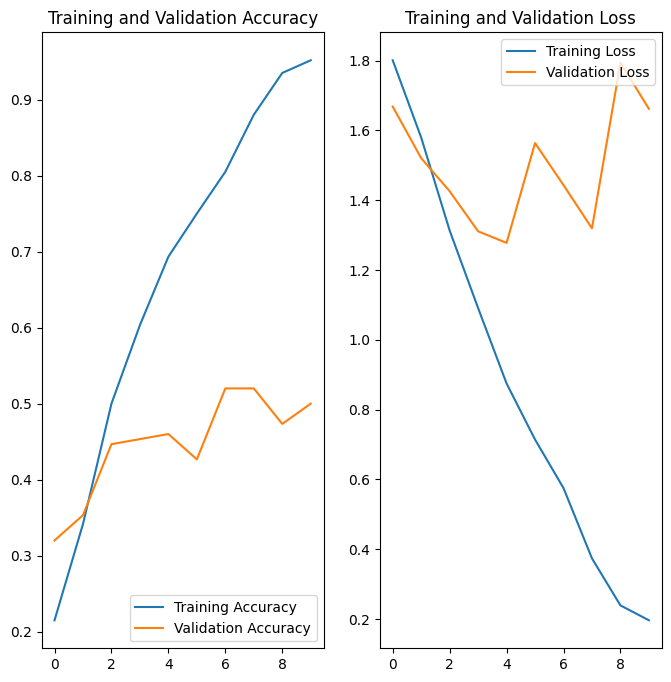

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Membuat arsitektur Deep Learning (4)
Jika menggunakan 3 layer setelah augmentasi dan dengan dropout

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])


## Compile ulang

In [ ]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])


## Training Data

In [ ]:
epochs = 15
history = model.fit(
training_images,
validation_data=test_images,
epochs=epochs
)


Epoch 1/15
19/19 [==============================] - 2s 27ms/step - loss: 1.8503 - accuracy: 0.2150 - val_loss: 1.7215 - val_accuracy: 0.3600
Epoch 2/15
19/19 [==============================] - 0s 16ms/step - loss: 1.6429 - accuracy: 0.3083 - val_loss: 1.4932 - val_accuracy: 0.3533
Epoch 3/15
19/19 [==============================] - 0s 20ms/step - loss: 1.5651 - accuracy: 0.3383 - val_loss: 1.4636 - val_accuracy: 0.3267
Epoch 4/15
19/19 [==============================] - 0s 21ms/step - loss: 1.4207 - accuracy: 0.4150 - val_loss: 1.4354 - val_accuracy: 0.3800
Epoch 5/15
19/19 [==============================] - 0s 21ms/step - loss: 1.3786 - accuracy: 0.4367 - val_loss: 1.5435 - val_accuracy: 0.3667
Epoch 6/15
19/19 [==============================] - 0s 18ms/step - loss: 1.3316 - accuracy: 0.4700 - val_loss: 1.4545 - val_accuracy: 0.4400
Epoch 7/15
19/19 [==============================] - 0s 20ms/step - loss: 1.2443 - accuracy: 0.5150 - val_loss: 1.2991 - val_accuracy: 0.4600
Epoch 8/15
19

## Plot Hasil Training

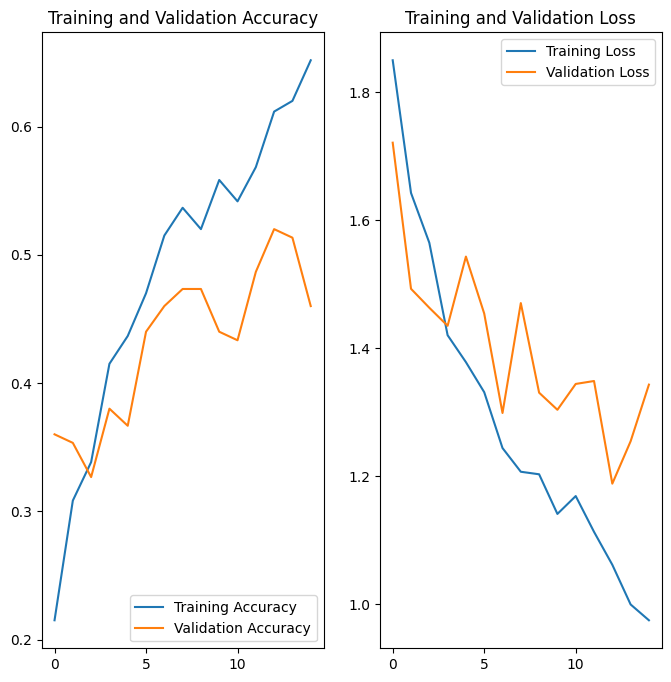

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Memprediksi jenis bangunan yang belum dilihat

1/1 [==============================] - 0s 77ms/step
This image most likely belongs to Retail with a 55.76 percent confidence.


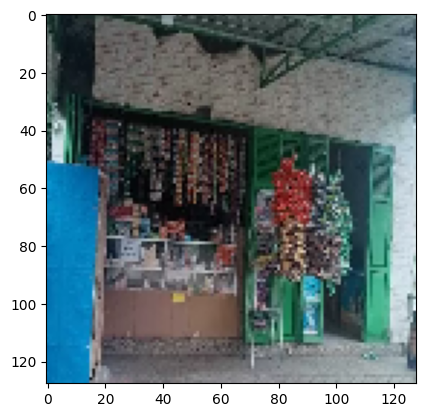

In [ ]:
# retail
image_baru_url ="https://static.promediateknologi.id/crop/103x147:1015x601/750x500/webp/photo/2023/02/09/3753533425.jpg"
image_baru_path = tf.keras.utils.get_file('retail1',origin=image_baru_url)
img = tf.keras.utils.load_img(
  image_baru_path, target_size=(128, 128)
)
plt.imshow(img)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch


predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])


print(
   "This image most likely belongs to {} with a {:.2f} percent confidence."
   .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 18ms/step
This image most likely belongs to Tempat_Ibadah with a 57.62 percent confidence.


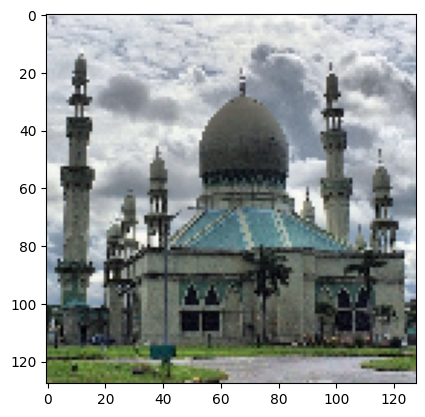

In [ ]:
# tempat ibadah
image_baru_url ="https://dynamic-media-cdn.tripadvisor.com/media/photo-o/05/39/2e/ec/masjid-kampung-pandan.jpg?w=1200&h=-1&s=1"
image_baru_path = tf.keras.utils.get_file('mesjid1',origin=image_baru_url)
img = tf.keras.utils.load_img(
  image_baru_path, target_size=(128, 128)
)
plt.imshow(img)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch


predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])


print(
   "This image most likely belongs to {} with a {:.2f} percent confidence."
   .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 20ms/step
This image most likely belongs to Restoran with a 73.35 percent confidence.


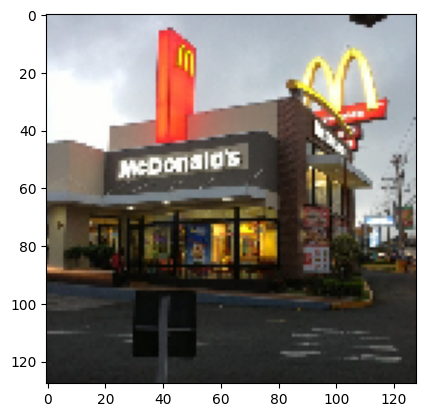

In [ ]:
# restoran
image_baru_url ="https://igx.4sqi.net/img/general/600x600/62250898_fbIDDOZHICK4BnaRvgXTVdDxg5FD3IEqOnWVnuYr3k0.jpg"
image_baru_path = tf.keras.utils.get_file('restoran1',origin=image_baru_url)
img = tf.keras.utils.load_img(
  image_baru_path, target_size=(128, 128)
)
plt.imshow(img)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch


predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])


print(
   "This image most likely belongs to {} with a {:.2f} percent confidence."
   .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 39ms/step
This image most likely belongs to Rumah with a 76.59 percent confidence.


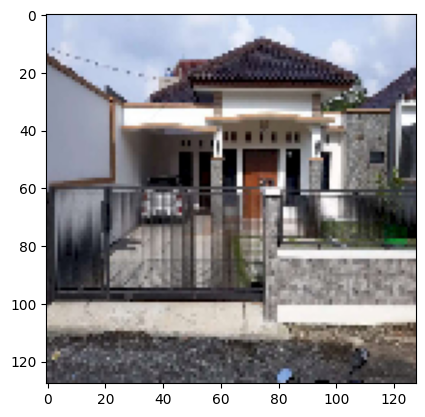

In [39]:
# rumah
image_baru_url ="https://www.wadjakaryadunia.com/wp-content/uploads/2023/07/inspirasi-rumah-minimalis.webp"
image_baru_path = tf.keras.utils.get_file('rumah2',origin=image_baru_url)
img = tf.keras.utils.load_img(
  image_baru_path, target_size=(128, 128)
)
plt.imshow(img)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch


predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])


print(
   "This image most likely belongs to {} with a {:.2f} percent confidence."
   .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 122ms/step
This image most likely belongs to Apartemen with a 67.13 percent confidence.


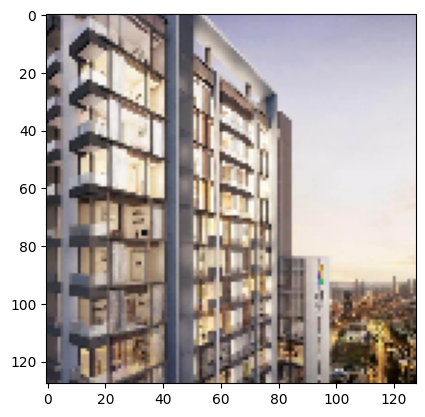

In [40]:
# apart
image_baru_url ="https://31sudirmansuites.com/wp-content/uploads/2019/11/FEATURED_10_20191115031104-814x534-1.jpg"
image_baru_path = tf.keras.utils.get_file('apart2',origin=image_baru_url)
img = tf.keras.utils.load_img(
  image_baru_path, target_size=(128, 128)
)
plt.imshow(img)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch


predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])


print(
   "This image most likely belongs to {} with a {:.2f} percent confidence."
   .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 22ms/step
This image most likely belongs to Sekolah with a 40.84 percent confidence.


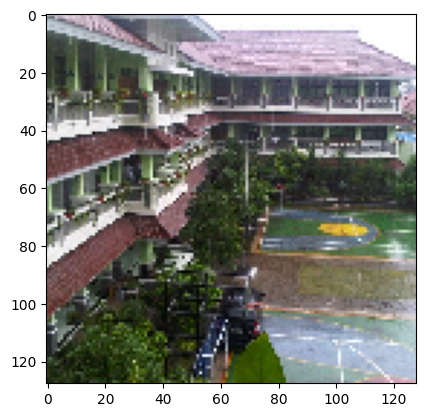

In [ ]:
# sekolah
image_baru_url ="https://fastly.4sqi.net/img/general/600x600/34404453_nI-P38hMa-3afaHewIO74R6NMZrLU18oJoYhShO7-RI.jpg"
image_baru_path = tf.keras.utils.get_file('school3',origin=image_baru_url)
img = tf.keras.utils.load_img(
  image_baru_path, target_size=(128, 128)
)
plt.imshow(img)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch


predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])


print(
   "This image most likely belongs to {} with a {:.2f} percent confidence."
   .format(class_names[np.argmax(score)], 100 * np.max(score))
)
